# Neural-Network-based Iris Flower Classification
Code by [karbon](https://github.com/csy-tvgo)

Reference:  
1.[Keras Documentation](https://keras.io/)  
2.[Iris Flower Dataset](https://archive.ics.uci.edu/ml/datasets/Iris/)

## 0 Dataset Description
Description Source: [https://archive.ics.uci.edu/ml/datasets/Iris/](https://archive.ics.uci.edu/ml/datasets/Iris/)  
>**Data Set Information:**  
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.  
Predicted attribute: class of iris plant.  
This is an exceedingly simple domain.  
**Attribute Information:**  
column 1: sepal length in cm  
column 2: sepal width in cm  
column 3: petal length in cm  
column 4: petal width in cm  
column 5: class:  
-- Iris Setosa  
-- Iris Versicolour  
-- Iris Virginica  

## 1 Observe the data  
Load dataset from csv file.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Declare list for storing dataset
sepal_length = np.array([])
sepal_width = np.array([])
petal_length = np.array([])
petal_width = np.array([])
iris_class = np.array([])

# Load dataset from csv file
reader = csv.reader(open('C:\\Users\\admin\代码\机器学习\\irisDataset.csv','r'))
for row in reader:
    sepal_length = np.append(sepal_length, float(row[0]))
    sepal_width = np.append(sepal_width, float(row[1]))
    petal_length = np.append(petal_length, float(row[2]))
    petal_width = np.append(petal_width, float(row[3]))
    iris_class = np.append(iris_class, row[4])

Observe the format of data. (Take 10 examples randomly)

In [2]:
h =set()      # 创建一个无序不重复的数据集
while(len(h)<10):
    h.add(random.randint(0, 149))         # set 数据集中 .add() 方法
    
print("ID \t SEPAL_LENGTH \t SEPAL_WIDTH \t PETAL_LENGTH \t PETAL_WIDTH \t|| CLASS")
for i in h:
    print("%d \t %.1f \t\t %.1f \t\t %.1f \t\t %.1f \t\t|| %s" 
          % (i, sepal_length[i], sepal_width[i], petal_length[i], petal_width[i], iris_class[i]))

ID 	 SEPAL_LENGTH 	 SEPAL_WIDTH 	 PETAL_LENGTH 	 PETAL_WIDTH 	|| CLASS
65 	 6.7 		 3.1 		 4.4 		 1.4 		|| versicolor
72 	 6.3 		 2.5 		 4.9 		 1.5 		|| versicolor
74 	 6.4 		 2.9 		 4.3 		 1.3 		|| versicolor
140 	 6.7 		 3.1 		 5.6 		 2.4 		|| virginica
12 	 4.8 		 3.0 		 1.4 		 0.1 		|| setosa
111 	 6.4 		 2.7 		 5.3 		 1.9 		|| virginica
80 	 5.5 		 2.4 		 3.8 		 1.1 		|| versicolor
57 	 4.9 		 2.4 		 3.3 		 1.0 		|| versicolor
90 	 5.5 		 2.6 		 4.4 		 1.2 		|| versicolor
60 	 5.0 		 2.0 		 3.5 		 1.0 		|| versicolor


Plot dataset.

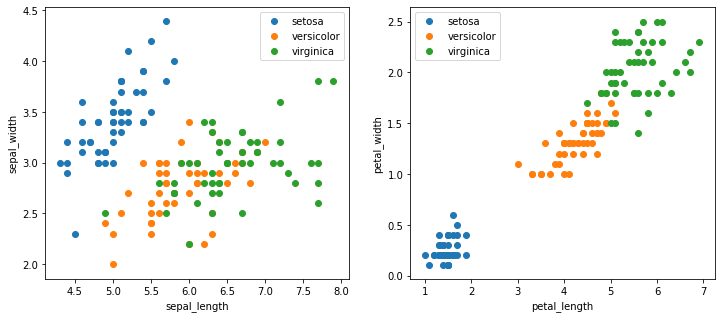

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(sepal_length[iris_class=='setosa'], sepal_width[iris_class=='setosa'])
plt.scatter(sepal_length[iris_class=='versicolor'], sepal_width[iris_class=='versicolor'])
plt.scatter(sepal_length[iris_class=='virginica'], sepal_width[iris_class=='virginica'])
plt.legend(("setosa","versicolor","virginica"))
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.subplot(1,2,2)
plt.scatter(petal_length[iris_class=='setosa'], petal_width[iris_class=='setosa'])
plt.scatter(petal_length[iris_class=='versicolor'], petal_width[iris_class=='versicolor'])
plt.scatter(petal_length[iris_class=='virginica'], petal_width[iris_class=='virginica'])
plt.legend(("setosa","versicolor","virginica"))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()


## 2 Preprocess dataset and Divide dataset  
Through observing the figure above, we can find that it's easier to classify iris flowers by `petal_width` and `petal_length`. So, we can simplify the problem by ignoring `sepal_width` and `sepal_length`. (This kind of operation may decrease accuracy)

In [4]:
dataset_x = np.array((petal_length, petal_width)).T
# 原来合并出来的是(2*150)的矩阵  .T 将其转置成(150*2)的矩阵 将原矩阵的行列互换
dataset_y = np.zeros(iris_class.shape, dtype=int)
dataset_y[iris_class == 'setosa'] = 0
dataset_y[iris_class == 'versicolor'] = 1
dataset_y[iris_class == 'virginica'] = 2

As an example, we define $80\%$ of the raw dataset is trainset and the other $20\%$ is testset.

In [5]:
num = len(iris_class)
splitLine = int(0.8*num)

# generate a random list to select data randomly
index = [i for i in range(0, num)]
random.shuffle(index)

# divide into trainset and testset
train_x = dataset_x[index[0:splitLine]]
train_y = dataset_y[index[0:splitLine]] 
test_x = dataset_x[index[splitLine:num]]
test_y = dataset_y[index[splitLine:num]]

Encode the classes into one-hot encoding.  
For example,  
$ 0\rightarrow [1,0,0] $  
$ 1\rightarrow [0,1,0] $  
$ 2\rightarrow [0,0,1] $

In [6]:
# One-Hot Encoding
train_y_onehot = keras.utils.to_categorical(train_y, 3)
test_y_onehot = keras.utils.to_categorical(test_y, 3)

Let's observe the trainset and testset in different marker.

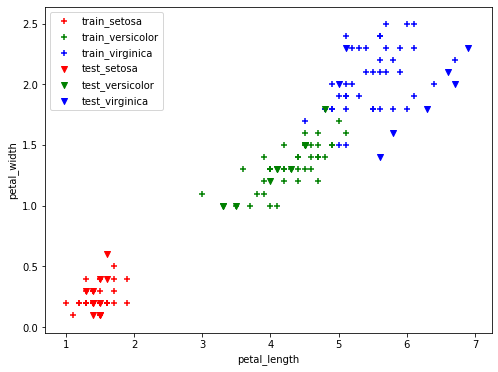

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(train_x[train_y==0, 0], train_x[train_y==0, 1], marker='+', color='red')  
# train_x [train_y==0,1] 在train_x的第1列寻找train_y中标签为0的值 i.e 找setosa对应的widths
plt.scatter(train_x[train_y==1, 0], train_x[train_y==1, 1], marker='+', color='green')
plt.scatter(train_x[train_y==2, 0], train_x[train_y==2, 1], marker='+', color='blue')
plt.scatter(test_x[test_y==0, 0], test_x[test_y==0, 1], marker='v', color='red')
plt.scatter(test_x[test_y==1, 0], test_x[test_y==1, 1], marker='v', color='green')
plt.scatter(test_x[test_y==2, 0], test_x[test_y==2, 1], marker='v', color='blue')
plt.legend(("train_setosa","train_versicolor","train_virginica","test_setosa","test_versicolor","test_virginica"))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

# 3 Describe your neural network  
Then, let's create our nerual network.  
As an example, we describe a simple network as below. (The details of how to describe layers of network can find [here](https://tensorflow.google.cn/api_docs/python/tf/keras/layers/Dense?hl=zh-CN))

In [8]:
# describe the model
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(2,)),  # 2个input分别为 petal_length 和 petal_width
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We can use `.summary` to print the brief description of the model.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,547
Trainable params: 4,547
Non-trainable params: 0
_________________________________________________________________


We can use **Mean Square Error (MSE)** as `loss` function, and use **Stochastic Gradient Descent (SGD)** as the process we train the model (i.e. "`optimizer`").  
(PS: MSE is not so suitable for classification)

In [10]:
model.compile(loss='mse', optimizer='sgd')

# 4 Training  
We can use `.fit` to automatically train the model.

In [11]:
model.fit(train_x, train_y_onehot, batch_size=4, epochs=100, verbose=1)  # verbose = 1(默认): 打印进度条   verbose=0: 不打印进度条

Train on 120 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/sample - loss: 0.2257
Epoch 2/100
120/120 [==============================] - 0s 382us/sample - loss: 0.2078
Epoch 3/100
120/120 [==============================] - 0s 366us/sample - loss: 0.2008
Epoch 4/100
120/120 [==============================] - 0s 407us/sample - loss: 0.1973
Epoch 5/100
120/120 [==============================] - 0s 341us/sample - loss: 0.1953
Epoch 6/100
120/120 [==============================] - 0s 407us/sample - loss: 0.1937
Epoch 7/100
120/120 [==============================] - 0s 357us/sample - loss: 0.1918
Epoch 8/100
120/120 [==============================] - 0s 449us/sample - loss: 0.1903
Epoch 9/100
120/120 [==============================] - 0s 357us/sample - loss: 0.1887
Epoch 10/100
120/120 [==============================] - 0s 399us/sample - loss: 0.1875
Epoch 11/100
120/120 [==============================] - 0s 382us/sample - loss: 0.1858
Epoch 12/100
120/120 [===========

120/120 [==============================] - 0s 308us/sample - loss: 0.0728
Epoch 95/100
120/120 [==============================] - 0s 308us/sample - loss: 0.0730
Epoch 96/100
120/120 [==============================] - 0s 282us/sample - loss: 0.0709
Epoch 97/100
120/120 [==============================] - 0s 316us/sample - loss: 0.0713
Epoch 98/100
120/120 [==============================] - 0s 316us/sample - loss: 0.0699
Epoch 99/100
120/120 [==============================] - 0s 291us/sample - loss: 0.0670
Epoch 100/100
120/120 [==============================] - 0s 299us/sample - loss: 0.0687


# 5 Evaluation of the trained model  
We can use `.evaluate` to compute **loss** on testset.

In [12]:
cost = model.evaluate(test_x, test_y_onehot)
print('test cost:', cost)

30/30 [==============================] - 0s 2ms/sample - loss: 0.0829
test cost: 0.08287645876407623


Then, we use the trained model to compute **scores** of testset.

In [13]:
scores = model.predict(test_x)
print(scores)

[[0.01473163 0.5292347  0.45603374]
 [0.8181273  0.15756465 0.02430802]
 [0.00660607 0.26332924 0.73006475]
 [0.08035083 0.5695213  0.3501279 ]
 [0.00632487 0.44128713 0.552388  ]
 [0.68018436 0.26148954 0.05832614]
 [0.22839998 0.56740737 0.20419264]
 [0.22839998 0.56740737 0.20419264]
 [0.83767235 0.14583267 0.01649499]
 [0.03917255 0.5018703  0.45895717]
 [0.02785603 0.6242829  0.34786105]
 [0.03917255 0.5018703  0.45895717]
 [0.8370972  0.14547785 0.01742489]
 [0.20740303 0.59061337 0.20198365]
 [0.00276289 0.34843692 0.64880013]
 [0.00090558 0.212086   0.78700846]
 [0.82974607 0.15043499 0.01981903]
 [0.00209529 0.29036468 0.70754   ]
 [0.8126831  0.16334394 0.02397301]
 [0.10668386 0.59854335 0.2947728 ]
 [0.773046   0.19513223 0.03182177]
 [0.03917255 0.5018703  0.45895717]
 [0.82831204 0.15265492 0.01903306]
 [0.82974607 0.15043499 0.01981903]
 [0.01393774 0.354675   0.63138723]
 [0.83767235 0.14583267 0.01649499]
 [0.7630403  0.20482685 0.03213283]
 [0.00222543 0.15028004 0.84

Postprocessing.

In [14]:
results = np.array([])
for i in scores:
    results = np.append(results, np.argmax(i))   # np.argmax() 返回最大值的index
print(results)

[1. 0. 2. 1. 2. 0. 1. 1. 0. 1. 1. 1. 0. 1. 2. 2. 0. 2. 0. 1. 0. 1. 0. 0.
 2. 0. 0. 2. 1. 1.]


Visualize our model of prediction.

[[1.3  0.1 ]
 [1.35 0.1 ]
 [1.4  0.1 ]
 ...
 [6.75 2.25]
 [6.8  2.25]
 [6.85 2.25]]


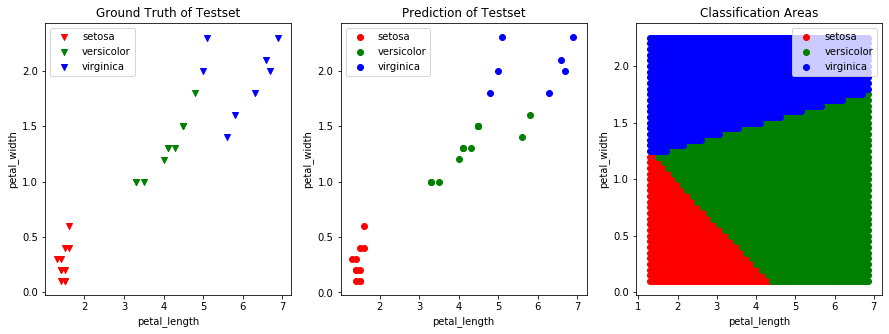

In [15]:
plt.figure(figsize=(15,5))

# draw ground truth
plt.subplot(1,3,1)
plt.scatter(test_x[test_y==0, 0], test_x[test_y==0, 1], marker='v', color='red')
plt.scatter(test_x[test_y==1, 0], test_x[test_y==1, 1], marker='v', color='green')
plt.scatter(test_x[test_y==2, 0], test_x[test_y==2, 1], marker='v', color='blue')
plt.legend(("setosa","versicolor","virginica"))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Ground Truth of Testset')

# draw prediction
plt.subplot(1,3,2)
plt.scatter(test_x[results==0, 0], test_x[results==0, 1], color='red')
plt.scatter(test_x[results==1, 0], test_x[results==1, 1], color='green')
plt.scatter(test_x[results==2, 0], test_x[results==2, 1], color='blue')
plt.legend(("setosa","versicolor","virginica"))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Prediction of Testset')

# draw classification areas
x = np.arange(min(test_x[:,0]), max(test_x[:,0]), 0.05)
y = np.arange(min(test_x[:,1]), max(test_x[:,1]), 0.05)
X,Y = np.meshgrid(x,y)
grid = np.array((X.flatten(), Y.flatten())).T
scores_1 = model.predict(grid)
decisions = np.array([])
for i in scores_1:
    decisions = np.append(decisions, np.argmax(i))
print(grid)
plt.subplot(1,3,3)
plt.scatter(grid[decisions==0, 0], grid[decisions==0, 1], color='red')
plt.scatter(grid[decisions==1, 0], grid[decisions==1, 1], color='green')
plt.scatter(grid[decisions==2, 0], grid[decisions==2, 1], color='blue')
plt.legend(("setosa","versicolor","virginica"))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Classification Areas')

plt.show()